In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.makedirs("../plots/behavior_rfm_kpis", exist_ok=True)
df = pd.read_csv("../data/cleaned_superstore_rfm.csv")

In [3]:
kpis = {"KPI": [], "Value": []}

In [4]:
avg_recency = df["Recency"].mean()

kpis["KPI"].append("Avg Recency (Days)")
kpis["Value"].append(round(avg_recency, 2))

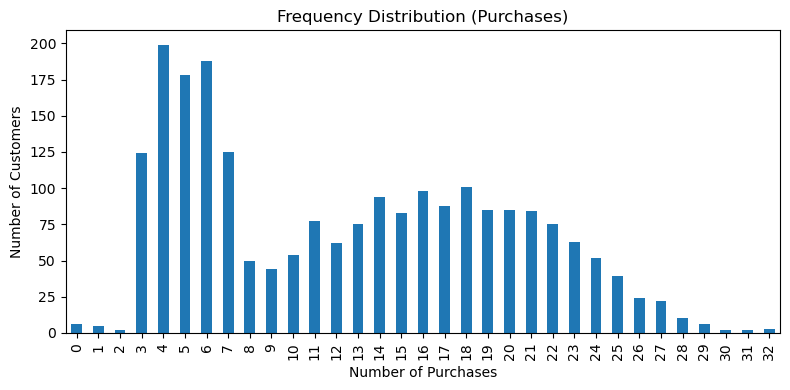

In [5]:
freq_dist = df["Frequency"].value_counts().sort_index()

kpis["KPI"].append("Frequency Distribution")
kpis["Value"].append("; ".join([f"{int(k)}: {v}" for k, v in freq_dist.items()]))

plt.figure(figsize=(8, 4))
freq_dist.plot(kind="bar")
plt.title("Frequency Distribution (Purchases)")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("../plots/behavior_rfm_kpis/frequency_distribution.png")
plt.show()

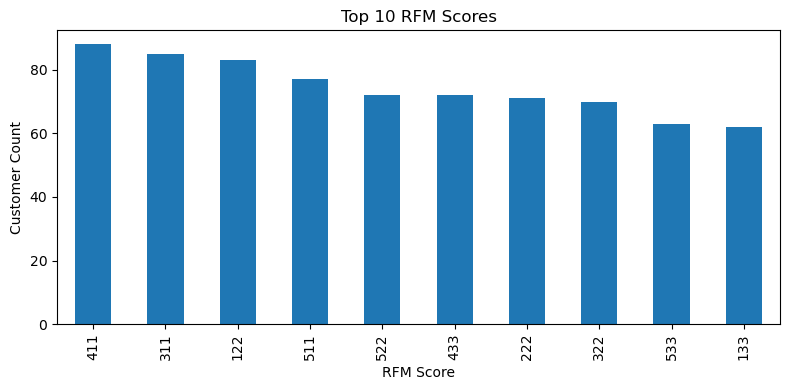

In [6]:
rfm_score_dist = df["RFM_Score"].value_counts().sort_values(ascending=False)
top_scores = rfm_score_dist.head(10)

kpis["KPI"].append("RFM Score Distribution (Top 10)")
kpis["Value"].append("; ".join([f"{k}: {v}" for k, v in top_scores.items()]))

plt.figure(figsize=(8, 4))
top_scores.plot(kind="bar")
plt.title("Top 10 RFM Scores")
plt.xlabel("RFM Score")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.savefig("../plots/behavior_rfm_kpis/top_rfm_scores.png")
plt.show()

In [7]:
top_rfm_score = rfm_score_dist.idxmax()
top_rfm_count = rfm_score_dist.max()

kpis["KPI"].append("Top RFM Segment")
kpis["Value"].append(f"{top_rfm_score} ({top_rfm_count} customers)")

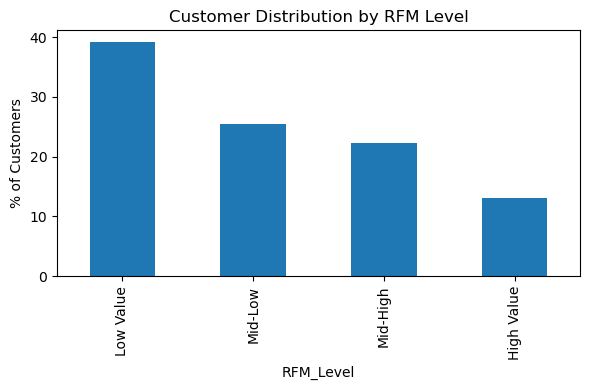

In [ ]:
rfm_level_pct = df["RFM_Level"].value_counts(normalize=True) * 100

kpis["KPI"].append("Customers by RFM Level (%)")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in rfm_level_pct.items()]))

plt.figure(figsize=(6, 4))
rfm_level_pct.plot(kind="bar", title="Customer Distribution by RFM Level")
plt.ylabel("% of Customers")
plt.tight_layout()
plt.savefig("../plots/behavior_rfm_kpis/rfm_level_distribution.png")
plt.show()

In [9]:
pd.DataFrame(kpis).to_csv("../exports/behavior_rfm_kpis_summary.csv", index=False)